# **Proyek Predictive Analytics: Prediksi Penyakit Jantung**

- **Nama:** Muhammad Husain Fadhlillah
- **Email Student:** mc006d5y2343@student.devacademy.id
- **Cohort ID:** MC006D5Y2343

## **1. Mengimpor Library yang Dibutuhkan**
Langkah pertama adalah mengimpor semua library Python yang akan digunakan.

In [1]:
# Untuk mengabaikan peringatan yang tidak relevan agar output lebih bersih
import warnings
warnings.filterwarnings('ignore')

# Library untuk data manipulation dan analysis
import pandas as pd
import numpy as np

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library dari Scikit-learn untuk machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Mengatur agar plot ditampilkan inline di notebook
%matplotlib inline

## **2. Data Loading dan Understanding**
Pada tahap ini akan memuat dataset, memberinya nama kolom yang sesuai, dan melakukan eksplorasi data awal untuk memahami strukturnya.

In [2]:
# URL dari dataset Heart Disease UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Nama kolom sesuai dengan dokumentasi dataset
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Memuat dataset menggunakan pandas
df = pd.read_csv(url, header=None, names=column_names, na_values='?')

# Menampilkan 5 baris pertama dari dataframe
print("Data Awal (5 baris pertama):")
display(df.head())

# Mengubah nilai target: nilai > 0 berarti ada penyakit jantung (diubah menjadi 1)
df['target'] = (df['target'] > 0).astype(int)

Data Awal (5 baris pertama):


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
# Menampilkan informasi dasar dataframe
print("\nInformasi DataFrame:")
df.info()


Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int32  
dtypes: float64(13), int32(1)
memory usage: 33.6 KB


## **3. Data Cleaning**
Pada tahap ini akan melakukan pembersihan data secara menyeluruh, meliputi:

1. Penanganan nilai yang hilang (missing values).
2. Penanganan data duplikat.
3. Penanganan outlier menggunakan metode IQR.

In [3]:
# 1. Penanganan Missing Values
print("--- 1. Penanganan Missing Values ---")
print(f"Jumlah baris awal: {len(df)}")
print(f"Jumlah missing values sebelum dibersihkan:\n{df.isnull().sum()}\n")
df.dropna(inplace=True)
print(f"Jumlah baris setelah menghapus missing values: {len(df)}\n")

# 2. Penanganan Data Duplikat
print("--- 2. Penanganan Data Duplikat ---")
print(f"Jumlah data duplikat: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Jumlah data duplikat setelah dihapus: {df.duplicated().sum()}")
print(f"Jumlah baris setelah menghapus duplikat: {len(df)}\n")

# 3. Penanganan Outlier dengan Metode IQR
print("--- 3. Penanganan Outlier ---")
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter data, membuang baris yang memiliki outlier di salah satu kolom numerik
# Kondisi `~` (not) digunakan untuk mempertahankan baris yang TIDAK outlier
df_clean = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Ukuran data sebelum menghapus outlier: {df.shape}")
print(f"Ukuran data setelah menghapus outlier: {df_clean.shape}")
print("Data telah bersih dan siap untuk analisis lebih lanjut.")

--- 1. Penanganan Missing Values ---
Jumlah baris awal: 303
Jumlah missing values sebelum dibersihkan:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Jumlah baris setelah menghapus missing values: 297

--- 2. Penanganan Data Duplikat ---
Jumlah data duplikat: 0
Jumlah data duplikat setelah dihapus: 0
Jumlah baris setelah menghapus duplikat: 297

--- 3. Penanganan Outlier ---
Ukuran data sebelum menghapus outlier: (297, 14)
Ukuran data setelah menghapus outlier: (278, 14)
Data telah bersih dan siap untuk analisis lebih lanjut.


## **3. Exploratory Data Analysis (EDA)**
Melakukan analisis dan visualisasi pada data yang sudah bersih (df_clean) untuk mendapatkan wawasan.

In [11]:
# Menampilkan informasi setelah pembersihan
print("\nInformasi DataFrame (setelah pembersihan):")
df_clean.info()


Informasi DataFrame (setelah pembersihan):
<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       278 non-null    float64
 1   sex       278 non-null    float64
 2   cp        278 non-null    float64
 3   trestbps  278 non-null    float64
 4   chol      278 non-null    float64
 5   fbs       278 non-null    float64
 6   restecg   278 non-null    float64
 7   thalach   278 non-null    float64
 8   exang     278 non-null    float64
 9   oldpeak   278 non-null    float64
 10  slope     278 non-null    float64
 11  ca        278 non-null    float64
 12  thal      278 non-null    float64
 13  target    278 non-null    int32  
dtypes: float64(13), int32(1)
memory usage: 31.5 KB


Statistik Deskriptif (Data Bersih):


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,54.172662,0.694245,3.133094,129.949640,243.147482,0.136691,0.985612,150.000000,0.316547,0.963669,1.571942,0.651079,4.665468,0.446043
std,9.136690,0.461558,0.968969,15.598215,44.900972,0.344140,0.998089,22.728185,0.465968,1.030585,0.601025,0.909546,1.928214,0.497977
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,0.000000,2.250000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,240.000000,0.000000,0.000000,153.000000,0.000000,0.600000,2.000000,0.000000,3.000000,0.000000
75%,60.750000,1.000000,4.000000,140.000000,272.500000,0.000000,2.000000,167.750000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,3.000000,3.000000,7.000000,1.000000


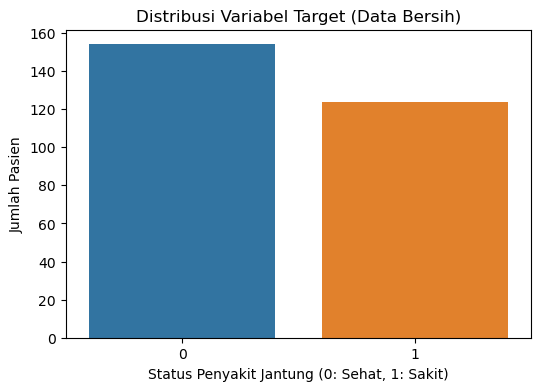

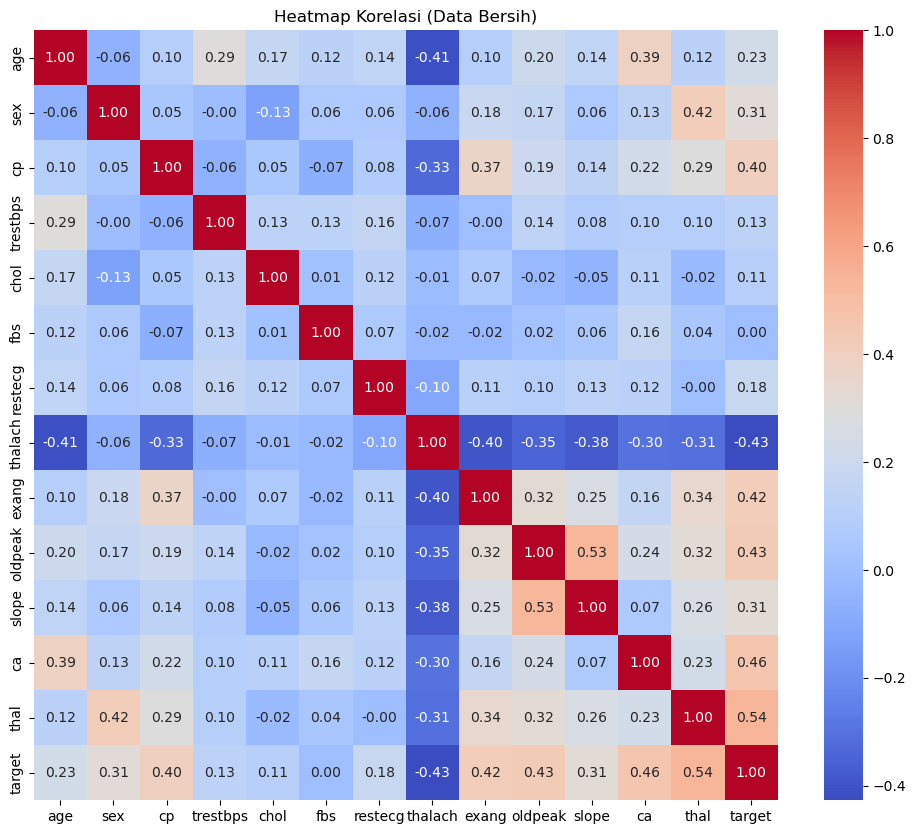

In [5]:
# Menampilkan statistik deskriptif dari data yang sudah bersih
print("Statistik Deskriptif (Data Bersih):")
display(df_clean.describe())

# Visualisasi distribusi variabel target pada data bersih
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_clean)
plt.title('Distribusi Variabel Target (Data Bersih)')
plt.xlabel('Status Penyakit Jantung (0: Sehat, 1: Sakit)')
plt.ylabel('Jumlah Pasien')
plt.show()

# Visualisasi korelasi antar fitur menggunakan heatmap pada data bersih
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi (Data Bersih)')
plt.show()

## **4. Data Preparation**
Memisahkan fitur dan target, membagi data menjadi set pelatihan dan pengujian, serta melakukan standarisasi fitur.

In [6]:
# Memisahkan fitur (X) dan target (y) dari dataframe bersih
X = df_clean.drop('target', axis=1)
y = df_clean['target']

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Menggunakan stratify=y untuk menjaga proporsi kelas target

print(f"Ukuran data latih: {X_train.shape}")
print(f"Ukuran data uji: {X_test.shape}\n")

# Standarisasi fitur numerik
scaler = StandardScaler()

# Melakukan fit dan transform pada data latih
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Hanya melakukan transform pada data uji (menggunakan scaler yang sudah di-fit)
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Data setelah standarisasi (5 baris pertama dari data latih):")
display(X_train.head())

Ukuran data latih: (222, 13)
Ukuran data uji: (56, 13)

Data setelah standarisasi (5 baris pertama dari data latih):


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
63,0.000000,0.0,3.0,0.349713,1.356057,1.0,0.0,0.863599,0.0,-0.976046,1.0,0.0,3.0
133,-0.327661,1.0,4.0,0.678124,0.364489,0.0,2.0,1.566349,1.0,-0.976046,1.0,0.0,3.0
30,1.638304,0.0,1.0,0.678124,-0.142825,0.0,0.0,0.029083,0.0,0.817186,1.0,2.0,3.0
55,0.000000,1.0,4.0,-0.372791,0.479788,0.0,2.0,-1.815636,1.0,1.215682,2.0,1.0,7.0
99,-0.655322,1.0,4.0,-0.504155,-0.534840,0.0,2.0,1.566349,0.0,-0.976046,1.0,0.0,3.0


## **5. Modeling**
Membangun, melatih, dan mengevaluasi dua model klasifikasi: Logistic Regression dan Random Forest.

In [7]:
# Inisialisasi model
log_reg = LogisticRegression(random_state=42)
rand_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Melatih model Logistic Regression
print("Melatih model Logistic Regression...")
log_reg.fit(X_train, y_train)

# Melatih model Random Forest
print("Melatih model Random Forest...")
rand_forest.fit(X_train, y_train)

print("\nKedua model berhasil dilatih.")

Melatih model Logistic Regression...
Melatih model Random Forest...

Kedua model berhasil dilatih.


## **6. Evaluation**
Evaluasi performa kedua model menggunakan berbagai metrik pada data uji.

--- Evaluasi Model: Logistic Regression ---
Akurasi: 0.88
Presisi: 0.85
Recall: 0.88
F1-Score: 0.86

Laporan Klasifikasi:
               precision    recall  f1-score   support

        Sehat       0.90      0.87      0.89        31
Sakit Jantung       0.85      0.88      0.86        25

     accuracy                           0.88        56
    macro avg       0.87      0.88      0.87        56
 weighted avg       0.88      0.88      0.88        56



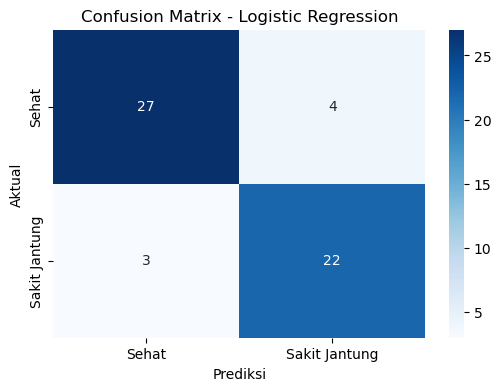

--- Evaluasi Model: Random Forest ---
Akurasi: 0.86
Presisi: 0.84
Recall: 0.84
F1-Score: 0.84

Laporan Klasifikasi:
               precision    recall  f1-score   support

        Sehat       0.87      0.87      0.87        31
Sakit Jantung       0.84      0.84      0.84        25

     accuracy                           0.86        56
    macro avg       0.86      0.86      0.86        56
 weighted avg       0.86      0.86      0.86        56



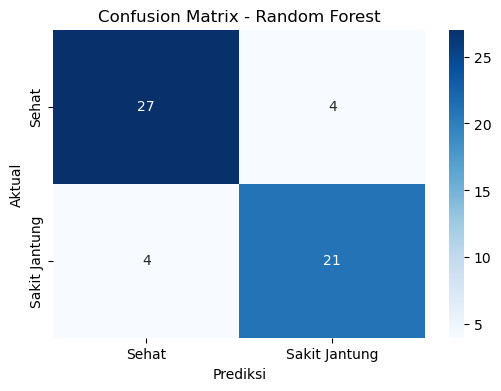

In [8]:
# Fungsi untuk mengevaluasi model dan menampilkan hasilnya
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"--- Evaluasi Model: {model_name} ---")
    print(f"Akurasi: {accuracy:.2f}")
    print(f"Presisi: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}\n")
    
    # Menampilkan classification report
    print("Laporan Klasifikasi:")
    print(classification_report(y_test, y_pred, target_names=['Sehat', 'Sakit Jantung']))
    
    # Menampilkan confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Sehat', 'Sakit Jantung'],
                yticklabels=['Sehat', 'Sakit Jantung'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()
    
    return {'Akurasi': accuracy, 'Presisi': precision, 'Recall': recall, 'F1-Score': f1}

# Mengevaluasi kedua model
log_reg_metrics = evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
rand_forest_metrics = evaluate_model(rand_forest, X_test, y_test, "Random Forest")

### **Perbandingan Hasil Evaluasi Model**

In [9]:
# Membuat DataFrame untuk membandingkan metrik
metrics_df = pd.DataFrame({
    'Logistic Regression': log_reg_metrics,
    'Random Forest': rand_forest_metrics
}).T # .T untuk transpose agar model menjadi baris

print("Perbandingan Metrik Evaluasi:")
display(metrics_df.round(3))

# Kesimpulan
best_model_name = metrics_df['F1-Score'].idxmax()
print(f"\nKesimpulan: Model terbaik berdasarkan F1-Score adalah **{best_model_name}**.")

Perbandingan Metrik Evaluasi:


,Akurasi,Presisi,Recall,F1-Score
Logistic Regression,0.875,0.846,0.88,0.863
Random Forest,0.857,0.840,0.84,0.840



Kesimpulan: Model terbaik berdasarkan F1-Score adalah **Logistic Regression**.
